In [1]:
pwd

'/fast/AG_Bunina/Yusuf/jobs'

In [2]:
cd '/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al'

/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al


In [3]:
ls

10_03_24_Authors_episcanpy_tutorial.ipynb*
12_03_24_cell_subsampling_for_topic_modelling.ipynb*
12_03_24_Sparse_DF_object_generation_from_ATAC_matrix.ipynb
adata_ATAC_modified.h5ad
adata_ATAC_prepared.h5ad
cis_object_subset.pkl
cis_object_subset_visualization/
cistopic_commands.ipynb
cistopic_mallet_modelling_error.ipynb*
cisTopicObject_subset_w_clusters.pkl
cisTopicObject_subset_w_model.pkl
cistopic_obj.h5ad
core.25918
core.30746
EpiScanpy_ATAC_preprocess.ipynb*
EpiScanpy_ATAC_preprocess_MODIFIED.ipynb
Mallet_models_500.pkl
model_selection.pdf
my_col_names.txt*
my_row_names.txt*
output/
sparse_df.pkl
sparse_df_subset.pkl
test-jupyter_128G.e7017149
test-jupyter_128G.o7017149
test-jupyter.e7016482
test-jupyter.e7016874
test-jupyter.o7016482
test-jupyter.o7016874
Zhu_et_al/
Zhu_et_al_ATAC_processing.ipynb
Zhu_et_al_ATAC_processing_MODIFIED.ipynb*
Zhu_et_al_peak_count_matrix_preparation_for_python.R
Zhu_et_al_RNA_preprocess.ipynb


In [4]:
import os

In [5]:
import scanpy as sc

In [6]:
import anndata as ad

adata = ad.read("adata_ATAC_modified.h5ad") 

In [7]:
adata

AnnData object with n_obs × n_vars = 45549 × 304034
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [8]:
# read the sparse df to retrieve blacklist filtered region names:

In [9]:
import pickle
infile = open('sparse_df.pkl', 'rb')
sparse_df = pickle.load(infile)
infile.close()

In [10]:
sparse_df

,4_AAACAGCCAACACTTG-1,4_AAACAGCCACCAAAGG-1,4_AAACAGCCATAAGTTC-1,4_AAACATGCATAGTCAT-1,4_AAACATGCATTGTCAG-1,4_AAACATGCATTGTGAT-1,4_AAACCGCGTCACCTAT-1,4_AAACCGCGTCAGGAAG-1,4_AAACCGGCAAGCCACT-1,4_AAACCGGCACATTGCA-1,...,150666_TTTGCATTCATGCTCC-1,150666_TTTGCGACATTTAAGC-1,150666_TTTGGCTGTAATGGAA-1,150666_TTTGGCTGTGACCTGG-1,150666_TTTGTCTAGGATGATG-1,150666_TTTGTGAAGACAACAG-1,150666_TTTGTGAAGGCTGTGC-1,150666_TTTGTGAAGTAAGAAC-1,150666_TTTGTGAAGTCTTGAA-1,150666_TTTGTTGGTGATCAGC-1
chr1:816964-817422,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
chr1:817809-818264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:818686-818982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:826700-827679,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:844454-844654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:21602310-21602954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:21821571-21822130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:21829019-21829544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:26352947-26353241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
adata_blacklist_filtered = adata[:,sparse_df.index]

In [12]:
adata_blacklist_filtered

View of AnnData object with n_obs × n_vars = 45549 × 302955
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [13]:
# Save the sparse DataFrame as a pickle file
with open('adata_blacklist_filtered.pkl', 'wb') as file:
    pickle.dump(adata_blacklist_filtered, file)

/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


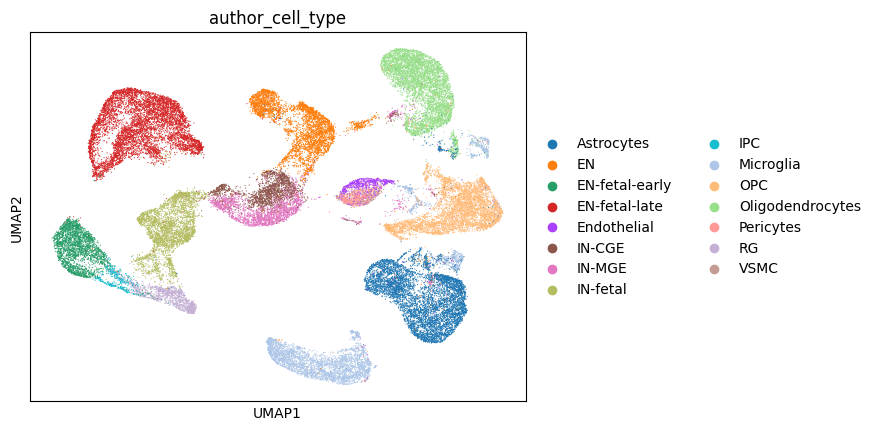

In [15]:
sc.pl.umap(adata_blacklist_filtered, color="author_cell_type")  

In [16]:
adata = adata_blacklist_filtered

In [23]:
adata.obs["author_cell_type"].value_counts()

author_cell_type
EN-fetal-late       6477
Astrocytes          6245
Oligodendrocytes    5459
OPC                 4896
Microglia           4528
EN                  4096
IN-fetal            3479
EN-fetal-early      2573
IN-MGE              2386
IN-CGE              1888
RG                  1322
Endothelial          754
Pericytes            677
IPC                  414
VSMC                 355
Name: count, dtype: int64

In [24]:
# I will randomly select 500 cells for each cell type having more than 500 cells.

In [25]:
import pandas as pd

# Get the value counts of the "author_cell_type" column in adata.obs
author_cell_type_counts = adata.obs["author_cell_type"].value_counts()

In [27]:
# Print the value counts
print(author_cell_type_counts)

author_cell_type
EN-fetal-late       6477
Astrocytes          6245
Oligodendrocytes    5459
OPC                 4896
Microglia           4528
EN                  4096
IN-fetal            3479
EN-fetal-early      2573
IN-MGE              2386
IN-CGE              1888
RG                  1322
Endothelial          754
Pericytes            677
IPC                  414
VSMC                 355
Name: count, dtype: int64


In [28]:
# To select 500 random cells from each cell type with more than 500 cells and 
# subset your AnnData object accordingly, including the "IPC" and "VSMC" cell types,
# we can use the following approach:

In [29]:
import numpy as np

# Define the minimum count threshold
min_count_threshold = 500

# Filter cell types with more than min_count_threshold cells
selected_cell_types = author_cell_type_counts[author_cell_type_counts > min_count_threshold].index.tolist()


In [30]:
print(selected_cell_types)

['EN-fetal-late', 'Astrocytes', 'Oligodendrocytes', 'OPC', 'Microglia', 'EN', 'IN-fetal', 'EN-fetal-early', 'IN-MGE', 'IN-CGE', 'RG', 'Endothelial', 'Pericytes']


In [31]:
len(selected_cell_types)

13

In [32]:
len(author_cell_type_counts)

15

In [43]:
# Check the code that takes the indices of the specified cell type:
len(np.where(adata.obs["author_cell_type"] == "RG")[0])

1322

In [44]:
# Number of cells are correct.

In [45]:
# Select 500 random cells from each selected cell type
selected_cells = []
for cell_type in selected_cell_types:
    # Get indices of cells belonging to the current cell type
    indices = np.where(adata.obs["author_cell_type"] == cell_type)[0]
    # Randomly sample 500 cells if there are more than 500 cells
    if len(indices) > 500:
        selected_cells.extend(np.random.choice(indices, size=500, replace=False))
    else:
        selected_cells.extend(indices)


In [48]:
len(selected_cells) # 500 cells for each 13 cell types:

6500

In [49]:
# Add cells from "IPC" and "VSMC" cell types
for cell_type in ["IPC", "VSMC"]:
    indices = np.where(adata.obs["author_cell_type"] == cell_type)[0]
    selected_cells.extend(np.random.choice(indices, size=min(500, len(indices)), replace=False))

# Subset the AnnData object
adata_subset = adata[selected_cells]



In [50]:
adata_subset

View of AnnData object with n_obs × n_vars = 7269 × 302955
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title', 'author_cell_type_colors'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [52]:
adata_subset.obs["author_cell_type"].value_counts()

author_cell_type
Astrocytes          500
EN                  500
EN-fetal-early      500
EN-fetal-late       500
Endothelial         500
IN-CGE              500
IN-MGE              500
IN-fetal            500
Microglia           500
OPC                 500
Oligodendrocytes    500
Pericytes           500
RG                  500
IPC                 414
VSMC                355
Name: count, dtype: int64

/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


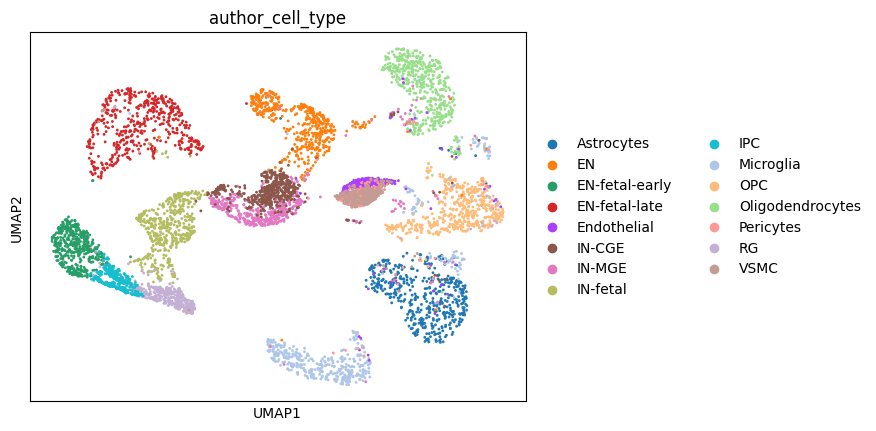

In [55]:
# Plot UMAP:
# Now, we can visualize the UMAP plot of the subsetted AnnData object
sc.pl.umap(adata_subset, color = "author_cell_type")

/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


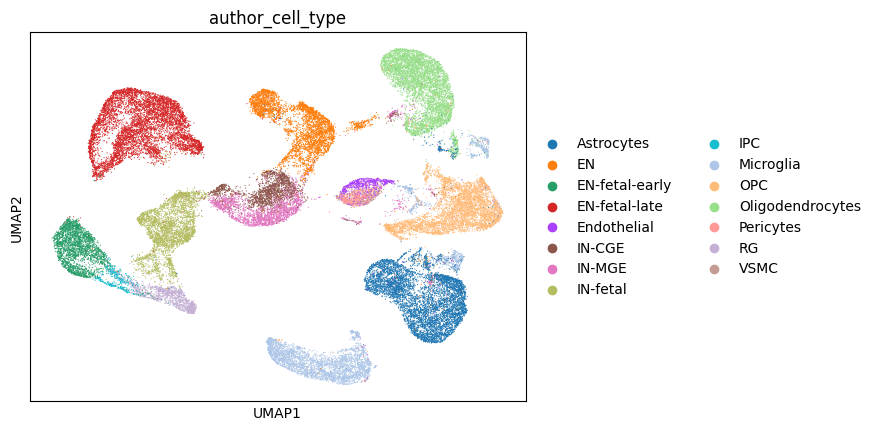

In [56]:
# Plot the whole dataset:
sc.pl.umap(adata, color = "author_cell_type")

In [57]:
# save the object:

# Save the sparse DataFrame as a pickle file
with open('adata_subset_7269_cells.pkl', 'wb') as file:
    pickle.dump(adata_subset, file)

In [64]:
# Check sum for each row:
rowsum = adata_subset.X.transpose().sum(axis=1)

In [72]:
rowsum.shape

(302955, 1)

In [70]:
import numpy as np

# Convert the matrix rowsum to a one-dimensional numpy array
rowsum_array = np.asarray(rowsum).flatten()

In [74]:
rowsum_array.shape[0]

302955

In [81]:
import numpy as np

# Count occurrences of True and False
counts = np.bincount(rowsum_array > 0)

# Print the counts
print(counts)

[     0 302955]


In [82]:
# As expected, all rows have at least one non-zero count. I have calculated it 
# before in the whole dataset and since I randomly selected these cells, there is at
# least one cell that has non-zero count for each feature.

In [83]:
# I will try to create a cistopic object for the subsampled cells:


In [84]:
# Firstly, I will create a sparse data frame:

In [85]:
# Create the sparse dataframe:

# Retrieve the trasnposed version of adata.X matrix, since we need cells as colnames :

sparse_matrix = adata_subset.X.transpose()

In [89]:
sparse_matrix.shape

(302955, 7269)

In [90]:
# Convert the sparse matrix to a sparse pandas DataFrame
sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix)

In [91]:
# Set row names (index)
sparse_df.index = adata_subset.var_names.tolist()

In [92]:
# Set colnames:
sparse_df.columns = adata_subset.obs_names.tolist()

In [93]:
sparse_df

,8_CTCTGTTCAATGCGCT-1,8_AATACCGGTGCTTTAC-1,8_CTAACCCTCGCAAACT-1,8_TTTGGTGCACCTCGCT-1,8_GGCTTCAAGAACCTGT-1,8_GATCGAGCAGTAGCCT-1,4_CCGCACACAGGAATCG-1,8_CTCATGCTCCTCATGC-1,4_GTAAGCGCATAATCGT-1,8_ACTTATGAGCACCACA-1,...,5936_ATAAGCCTCAACAAGG-1,4_CAAGGCCTCTCGACCT-1,150656_CGAAGAATCCTTAGGG-1,4422_TCTAGCCTCGGTAACT-1,150656_CAGCATTAGGTAAGGC-1,5936_CTACAACAGTAACAGG-1,5936_TCGGTTCTCATTTGCT-1,4422_GAACCGCTCATTGCGG-1,5936_TTGTGTGCACCCACCT-1,5936_TCAAGGAAGGAGGACT-1
chr1:816964-817422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:817809-818264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:818686-818982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:826700-827679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:844454-844654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:21602310-21602954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:21821571-21822130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:21829019-21829544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:26352947-26353241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# save the object:

# Save the sparse DataFrame as a pickle file
with open('sparse_df_7269_cells.pkl', 'wb') as file:
    pickle.dump(sparse_df, file)

In [95]:
# generate a cistopic object:



In [96]:
import warnings
warnings.simplefilter(action='ignore')
import pycisTopic
pycisTopic.__version__

'1.0a0'

In [97]:
# Create cisTopic object
from pycisTopic.cistopic_class import *
count_matrix=sparse_df
# my regions are already blacklist filtered.
# path_to_blacklist='/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al/Zhu_et_al/data/hg38-blacklist.v2.bed'
cistopic_obj = create_cistopic_object(fragment_matrix=count_matrix)


2024-03-13 14:22:57,652 cisTopic     INFO     Converting fragment matrix to sparse matrix
2024-03-13 14:23:36,776 cisTopic     INFO     Creating CistopicObject
2024-03-13 14:23:38,810 cisTopic     INFO     Done!


In [100]:
adata_subset.obs # check cell metadata:

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
8_CTCTGTTCAATGCGCT-1,EN-fetal-late,late fetal,LaFet2,12322,4021.0,4027.0,3628.0,0.15,0.955537,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,`|DJ^&j!PR
8_AATACCGGTGCTTTAC-1,EN-fetal-late,late fetal,LaFet2,6869,2734.0,6416.0,5582.0,0.48,0.903678,0.042762,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,CU!-kqPeF|
8_CTAACCCTCGCAAACT-1,EN-fetal-late,late fetal,LaFet2,5334,2378.0,3056.0,2749.0,0.44,0.855807,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,rFBeFXKjo#
8_TTTGGTGCACCTCGCT-1,EN-fetal-late,late fetal,LaFet2,9192,3347.0,445.0,434.0,0.00,1.010479,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,DzVubyaJ11
8_GGCTTCAAGAACCTGT-1,EN-fetal-late,late fetal,LaFet2,1491,1036.0,899.0,876.0,0.67,0.856018,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,!38)un{8$e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5936_CTACAACAGTAACAGG-1,VSMC,adolescence,Adol2,8190,2914.0,3482.0,3176.0,0.64,0.913653,0.039471,...,tissue,vascular associated smooth muscle cell,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,14-year-old human stage,sO!;O1(peo
5936_TCGGTTCTCATTTGCT-1,VSMC,adolescence,Adol2,4227,2064.0,4558.0,4144.0,0.38,1.176329,0.023838,...,tissue,vascular associated smooth muscle cell,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,14-year-old human stage,8>)k8h=zP3
4422_GAACCGCTCATTGCGG-1,VSMC,infancy,Inf2,4423,2158.0,2967.0,2729.0,0.34,1.147982,0.161925,...,tissue,vascular associated smooth muscle cell,10x multiome,normal,Homo sapiens,male,dorsolateral prefrontal cortex,unknown,immature stage,#a^;tzfiSK


In [101]:
sparse_df.shape # check the shape of the df used in generating cistopic object.

(302955, 7269)

In [102]:
# Adding cell information
cell_data =  adata_subset.obs
cistopic_obj.add_cell_data(cell_data)

In [103]:
# save the object:

# Save the sparse DataFrame as a pickle file
with open('cistopic_obj_7269_cells.pkl', 'wb') as file:
    pickle.dump(cistopic_obj, file)

In [ ]:
# Topic modelling:
# Now I submitted the following script to the MDC cluster:

#!/usr/bin/env python

# coding: utf-8

#projDir = "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al"

#outDir = projDir + "/output/"

outDir = "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al/"

# Load cisTopic object
import pickle
infile = open(outDir + 'cis_object_subset.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

# Temp dir
tmpDir = '/fast/AG_Bunina/scratch/Yusuf'

import warnings
warnings.simplefilter(action='ignore')
import pycisTopic
pycisTopic.__version__

from pycisTopic.cistopic_class import *

import os

path_to_mallet_binary='/fast/AG_Bunina/Yusuf/softwares/Mallet-202108/bin/mallet'

# Run models

models=run_cgs_models_mallet(path_to_mallet_binary,
                    cistopic_obj,
                    n_topics=[2,5,10,15,20,25,30,35,40,45,50],
                    n_cpu=24,
                    n_iter=500,
                    random_state=555,
                    alpha=50,
                    alpha_by_topic=True,
                    eta=0.1,
                    eta_by_topic=False,
                    tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                    save_path=None)

# Save

import pickle
with open(outDir+'Mallet_models_500.pkl', 'wb') as f:
  pickle.dump(models, f)


print("FINISHED !!!!")

In [108]:
# Save the object also as .h5ad file:

adata_subset.write_h5ad("adata_subset_7269_cells.h5ad", compression=True)

In [116]:
# cistopic object contains both the row matrix 
# and the binary matrix:

np.max(cistopic_obj.fragment_matrix)

29

In [117]:
np.max(cistopic_obj.binary_matrix)

1

In [122]:
# I will also create a cistopic object,
# using the adata object that contains 
# features that are-pre-filtered using
# episcanpy's variability score approach:

In [125]:
adata_feature_filtered = ad.read_h5ad("adata_subset_filtered_by_variability.h5ad")

In [126]:
adata_feature_filtered

AnnData object with n_obs × n_vars = 7269 × 60027
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_features', 'log_n_features'
    var: 'n_cells', 'log_n_cells', 'prop_shared_cells', 'variability_score', 'highly_variable'
    uns: 'author_cell_type_colors', 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [131]:
# take the region names:

keep_features = adata_feature_filtered.var_names.tolist() 


In [133]:
len(keep_features)

60027

In [136]:
keep_features[0:5]

['chr1:826700-827679',
 'chr1:869555-870357',
 'chr1:903620-905783',
 'chr1:909920-910800',
 'chr1:920567-921363']

In [139]:
# I will filter the subsetted adata object
# by the keep_features:

adata_subset_filtered_features = adata_subset[:,keep_features]

In [140]:
adata_subset_filtered_features

View of AnnData object with n_obs × n_vars = 7269 × 60027
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title', 'author_cell_type_colors'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [141]:
adata_subset_filtered_features.write_h5ad("adata_subset_filtered_cells_features.h5ad", compression=True)

In [142]:
# Create a cistopic object:

# Create firstly the sparse dataframe:

# Retrieve the transposed version of adata.X matrix, since we need cells as colnames :

sparse_matrix_filtered = adata_subset_filtered_features.X.transpose()


In [143]:
sparse_matrix_filtered.shape

(60027, 7269)

In [144]:
# Convert the sparse matrix to a sparse pandas DataFrame
sparse_df_filtered = pd.DataFrame.sparse.from_spmatrix(sparse_matrix_filtered)

In [145]:
# Set row names (index)
sparse_df_filtered.index = adata_subset_filtered_features.var_names.tolist()

In [146]:
# Set colnames:
sparse_df_filtered.columns = adata_subset_filtered_features.obs_names.tolist()

In [147]:
sparse_df_filtered

,8_CTCTGTTCAATGCGCT-1,8_AATACCGGTGCTTTAC-1,8_CTAACCCTCGCAAACT-1,8_TTTGGTGCACCTCGCT-1,8_GGCTTCAAGAACCTGT-1,8_GATCGAGCAGTAGCCT-1,4_CCGCACACAGGAATCG-1,8_CTCATGCTCCTCATGC-1,4_GTAAGCGCATAATCGT-1,8_ACTTATGAGCACCACA-1,...,5936_ATAAGCCTCAACAAGG-1,4_CAAGGCCTCTCGACCT-1,150656_CGAAGAATCCTTAGGG-1,4422_TCTAGCCTCGGTAACT-1,150656_CAGCATTAGGTAAGGC-1,5936_CTACAACAGTAACAGG-1,5936_TCGGTTCTCATTTGCT-1,4422_GAACCGCTCATTGCGG-1,5936_TTGTGTGCACCCACCT-1,5936_TCAAGGAAGGAGGACT-1
chr1:826700-827679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:869555-870357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:903620-905783,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
chr1:909920-910800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:920567-921363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:14523315-14525683,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
chrY:19075634-19078084,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
chrY:19566626-19568206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
chrY:19744039-19745332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
# save the object:
import pickle
with open('sparse_df_feature_filtered.pkl', 'wb') as f:
  pickle.dump(sparse_df_filtered, f)

In [149]:
# Create the cistopic object:


from pycisTopic.cistopic_class import *

count_matrix=sparse_df_filtered
# my regions are already blacklist filtered.
# path_to_blacklist='/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al/Zhu_et_al/data/hg38-blacklist.v2.bed'
cistopic_obj_filtered_features = create_cistopic_object(fragment_matrix=count_matrix)


2024-03-13 17:21:56,951 cisTopic     INFO     Converting fragment matrix to sparse matrix
2024-03-13 17:22:05,361 cisTopic     INFO     Creating CistopicObject
2024-03-13 17:22:06,686 cisTopic     INFO     Done!


In [150]:
# Adding cell information
cell_data_filtered =  adata_subset_filtered_features.obs
cistopic_obj_filtered_features.add_cell_data(cell_data_filtered)

In [151]:
cistopic_obj_filtered_features.binary_matrix.shape

(60027, 7269)

In [153]:
cistopic_obj_filtered_features.cell_data["author_cell_type"].value_counts()

author_cell_type
Astrocytes          500
EN                  500
EN-fetal-early      500
EN-fetal-late       500
Endothelial         500
IN-CGE              500
IN-MGE              500
IN-fetal            500
Microglia           500
OPC                 500
Oligodendrocytes    500
Pericytes           500
RG                  500
IPC                 414
VSMC                355
Name: count, dtype: int64

In [154]:
# save the object:
import pickle
with open('cistopic_obj_filtered_features.pkl', 'wb') as f:
  pickle.dump(cistopic_obj_filtered_features, f)


In [155]:
# Submitted the following job script: 

In [ ]:
#!/usr/bin/env python

# coding: utf-8

#projDir = "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al"

#outDir = projDir + "/output/"

outDir = "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al/"

# Load cisTopic object
import pickle
infile = open(outDir + 'cistopic_obj_filtered_features.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

# Temp dir
tmpDir = '/fast/AG_Bunina/scratch/Yusuf'

import warnings
warnings.simplefilter(action='ignore')
import pycisTopic
pycisTopic.__version__

from pycisTopic.cistopic_class import *

import os

path_to_mallet_binary='/fast/AG_Bunina/Yusuf/softwares/Mallet-202108/bin/mallet'

# Run models

models=run_cgs_models_mallet(path_to_mallet_binary,
                    cistopic_obj,
                   #n_topics=[2,5,10,15,20,25,30,35,40,45,50], # more than 10 topics cause memory error for this size of dataset.
                    n_topics=[2,5,10,15,20,25],
                    n_cpu=24,
                    n_iter=500,
                    random_state=555,
                    alpha=50,
                    alpha_by_topic=True,
                    eta=0.1,
                    eta_by_topic=False,
                    tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                    save_path=None)

# Save

import pickle
with open(outDir+'Mallet_models_w_7269_cells_feeatures_filtered.pkl', 'wb') as f:
  pickle.dump(models, f)


print("FINISHED !!!!")

In [156]:
import session_info

In [157]:
session_info.show()